In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Books_Data_Clean.csv")

In [3]:
data

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.00,20496.000,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.50,7462.500,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.00,28677.000,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.00,24750.000,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.50,22771.500,7.99,4,Penguin Group (USA) LLC,4750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,1065,2014.0,Gray Mountain,John Grisham,eng,Intermediate,3.52,37379,nonfiction,104.94,62.964,0.99,1268,"Amazon Digital Services, Inc.",106
1066,1066,1989.0,The Power of One,Bryce Courtenay,eng,Excellent,4.34,57312,genre fiction,846.94,508.164,7.99,1270,Random House LLC,106
1067,1067,1930.0,The Maltese Falcon,Dashiell Hammett,eng,Intermediate,3.92,58742,genre fiction,846.94,508.164,7.99,1271,Hachette Book Group,106
1068,1068,2011.0,Night Road,Kristin Hannah,en-US,Excellent,4.17,58028,genre fiction,104.94,62.964,0.99,1272,"Amazon Digital Services, Inc.",106


In [4]:
data.shape

(1070, 15)

In [5]:
data.describe()

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1070.000000,1069.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,534.500000,1971.377923,4.007000,94909.913084,1856.622944,843.281030,4.869561,611.652336,9676.980374
std,309.026698,185.080257,0.247244,31513.242518,3936.924240,2257.596743,3.559919,369.849830,15370.571306
min,0.000000,-560.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,267.250000,1985.000000,3.850000,70398.000000,372.465000,0.000000,1.990000,287.500000,551.250000
50%,534.500000,2003.000000,4.015000,89309.000000,809.745000,273.078000,3.990000,595.500000,3924.000000
75%,801.750000,2010.000000,4.170000,113906.500000,1487.957500,721.180500,6.990000,932.500000,5312.250000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


In [6]:
data["Publishing Year"].min()

-560.0

In [7]:
data = data[data["Publishing Year"] > 1900].copy()

In [8]:
data.isna().sum()

index                   0
Publishing Year         0
Book Name              21
Author                  0
language_code          49
Author_Rating           0
Book_average_rating     0
Book_ratings_count      0
genre                   0
gross sales             0
publisher revenue       0
sale price              0
sales rank              0
Publisher               0
units sold              0
dtype: int64

In [9]:
data.dropna(subset = "Book Name", inplace = True)

In [10]:
data.duplicated().sum()

0

In [11]:
data.nunique()

index                  988
Publishing Year        101
Book Name              987
Author                 669
language_code            8
Author_Rating            4
Book_average_rating    133
Book_ratings_count     983
genre                    4
gross sales            774
publisher revenue      570
sale price             143
sales rank             818
Publisher                9
units sold             470
dtype: int64

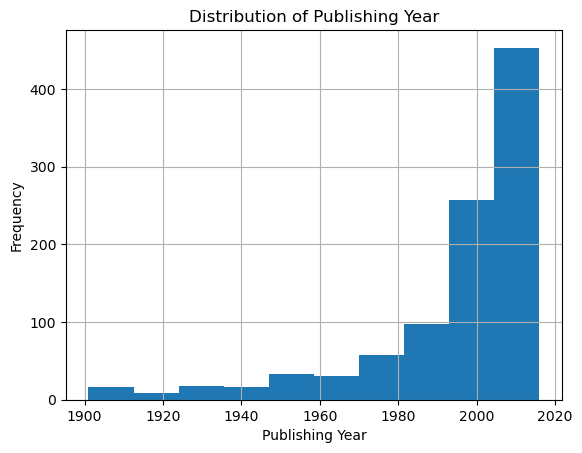

In [12]:
plt.hist(data["Publishing Year"])
plt.xlabel("Publishing Year")
plt.ylabel("Frequency")
plt.title("Distribution of Publishing Year")
plt.grid()
plt.show()

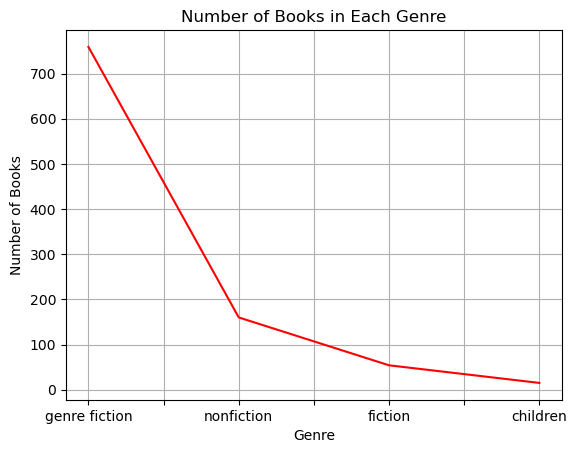

In [13]:
data["genre"].value_counts().plot(kind = "line", color = "red")
plt.xlabel("Genre")
plt.ylabel("Number of Books")
plt.title("Number of Books in Each Genre")
plt.grid()
plt.show()

In [14]:
data.groupby("Author")["Book_average_rating"].mean().sort_values(ascending = False)

Author
Bill Watterson                  4.650000
Bill Watterson, G.B. Trudeau    4.610000
J.R.R. Tolkien                  4.590000
George R.R. Martin              4.560000
Sarah J. Maas                   4.526000
                                  ...   
Chetan Bhagat                   3.273333
Audrey Niffenegger              3.230000
Herman Koch, Sam Garrett        3.220000
P.D. James                      3.210000
Sue Monk Kidd                   3.100000
Name: Book_average_rating, Length: 669, dtype: float64

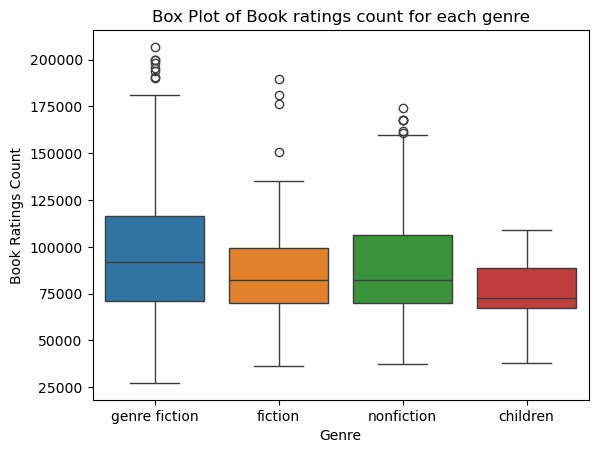

In [15]:
sns.boxplot(x = "genre", y = "Book_ratings_count", hue="genre", data = data)
plt.xlabel("Genre")
plt.ylabel("Book Ratings Count")
plt.title("Box Plot of Book ratings count for each genre")
plt.show()

Text(0.5, 1.0, 'Scatter Plot of Sale Price vs Units Sold')

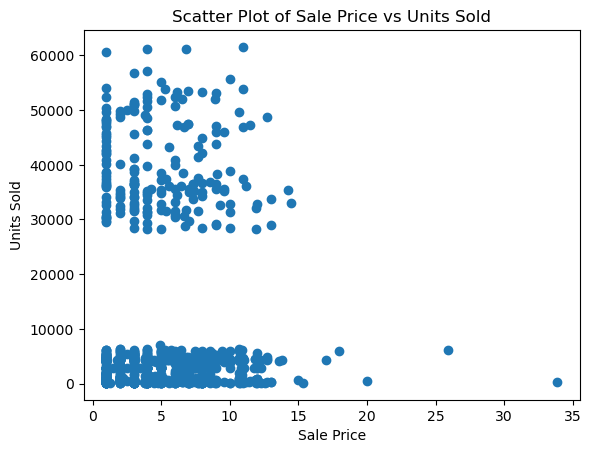

In [16]:
plt.scatter(data["sale price"], data["units sold"])
plt.xlabel("Sale Price")
plt.ylabel("Units Sold")
plt.title("Scatter Plot of Sale Price vs Units Sold")

In [17]:
language_counts = data["language_code"].value_counts()

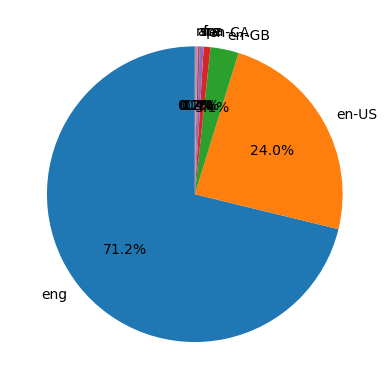

In [18]:
plt.pie(language_counts, labels = language_counts.index, startangle = 90, autopct = "%1.1f%%")
plt.show()

In [19]:
data.groupby("Publisher ")["publisher revenue"].sum().sort_values(ascending = False)

Publisher 
Penguin Group (USA) LLC                 191581.104
Random House LLC                        174956.244
Amazon Digital Services,  Inc.          141767.772
HarperCollins Publishers                121769.814
Hachette Book Group                     107410.968
Simon and Schuster Digital Sales Inc     46858.206
Macmillan                                31249.830
HarperCollins Publishing                  2830.806
HarperCollins Christian Publishing        2135.670
Name: publisher revenue, dtype: float64

In [20]:
data.groupby("Author_Rating")["Book_ratings_count"].mean().sort_values(ascending = False).max()

101400.27256944444

In [21]:
data.groupby("language_code").size().sort_values(ascending = False)

language_code
eng      670
en-US    226
en-GB     29
en-CA      7
fre        4
ara        2
spa        2
nl         1
dtype: int64

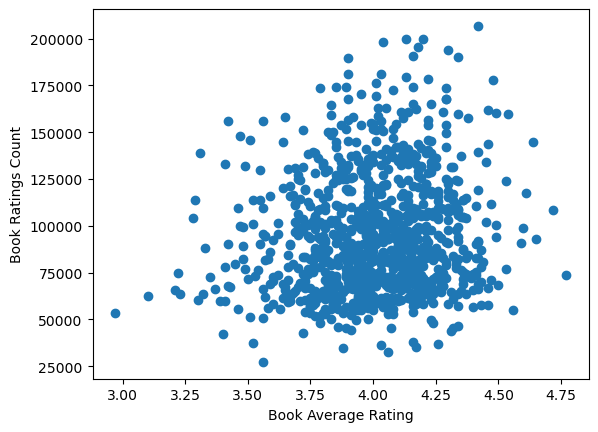

In [22]:
plt.scatter(data["Book_average_rating"], data["Book_ratings_count"])
plt.xlabel("Book Average Rating")
plt.ylabel("Book Ratings Count")
plt.show()

In [23]:
total_gross_sales_by_author = data.groupby("Author")["gross sales"].sum()

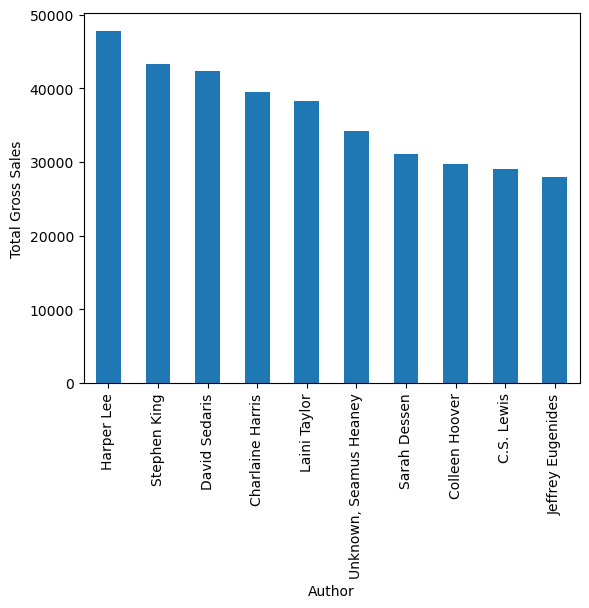

In [24]:
total_gross_sales_by_author.sort_values(ascending = False).head(10).plot(kind = "bar")
plt.xlabel("Author")
plt.ylabel("Total Gross Sales")
plt.show()

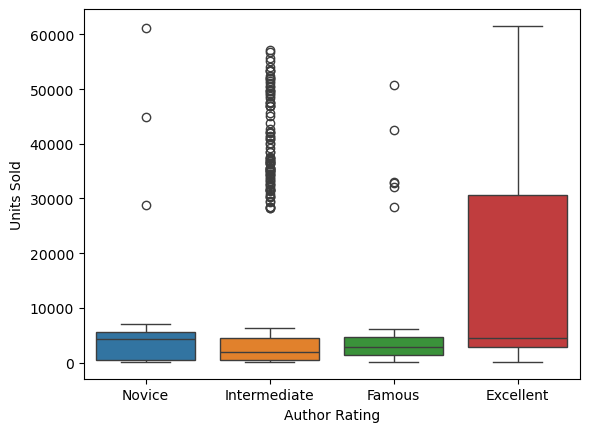

In [25]:
sns.boxplot(x = "Author_Rating", y = "units sold", hue="Author_Rating", data = data)
plt.xlabel("Author Rating")
plt.ylabel("Units Sold")
plt.show()

In [26]:
books_by_years = data.groupby("Publishing Year").size()

Text(0.5, 1.0, 'Number of Books Published by Year')

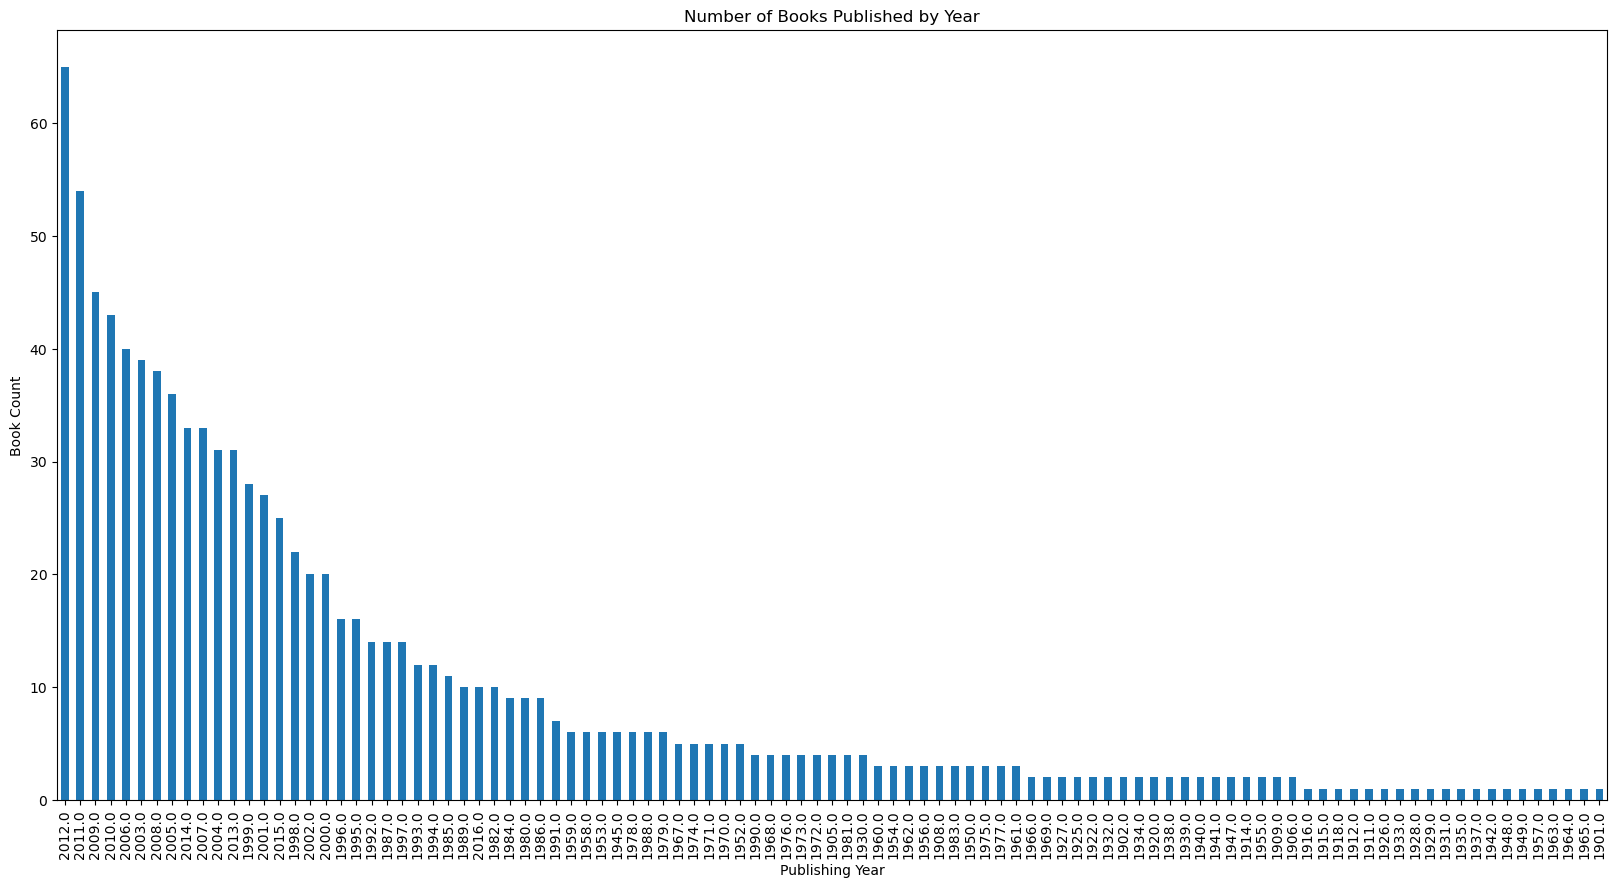

In [27]:
books_by_years.sort_values(ascending = False).plot(kind = "bar", figsize=(20,10))
plt.ylabel("Book Count")
plt.title("Number of Books Published by Year")

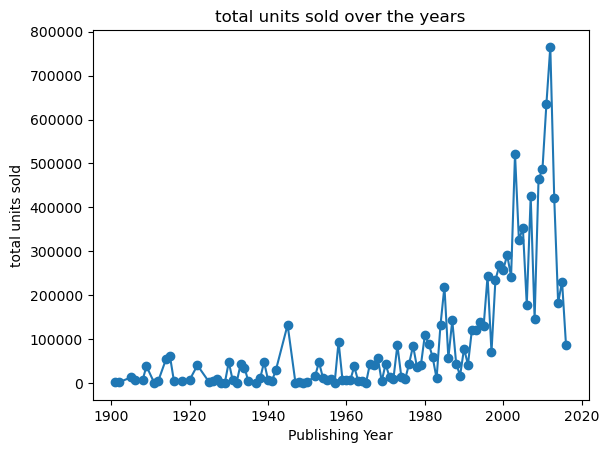

In [28]:
data.groupby("Publishing Year")["units sold"].sum().plot(kind = "line", marker = "o")
plt.ylabel("total units sold")
plt.title("total units sold over the years")
plt.show()